<a href="https://colab.research.google.com/github/kjh1696/22CPP/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

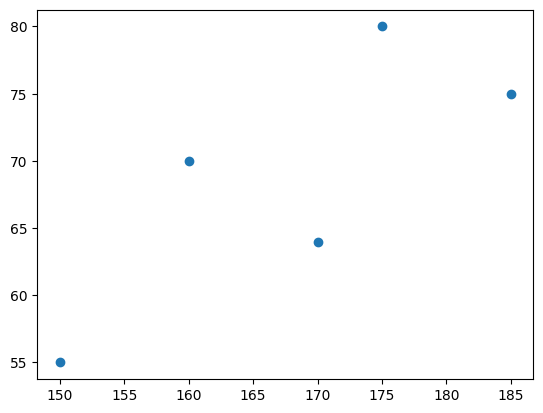

In [2]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([150,160,170,175,185.])
y = torch.tensor([55, 70, 64, 80, 75.])

N = len(x)
plt.plot(x,y,'o')

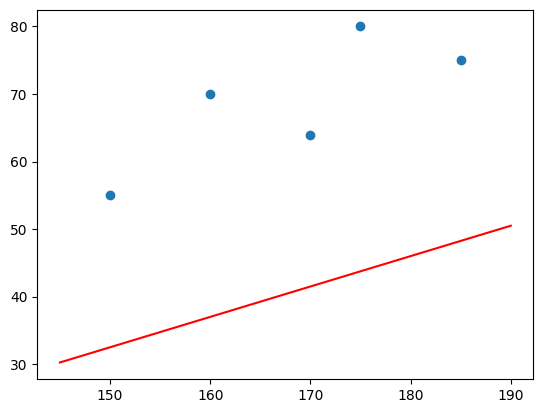

In [3]:
# 초깃값 설정
a = 0.45
b = -35

x_plot = torch.linspace(145, 190, 100)
y_plot = a * x_plot + b

plt.plot(x,y,'o')
plt.plot(x_plot, y_plot, 'r')

(0.0, 1000.0)

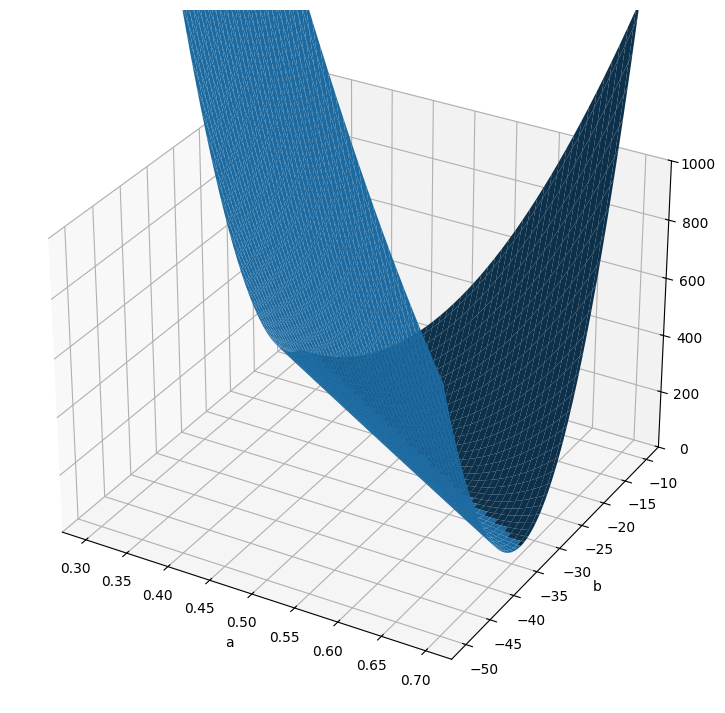

In [6]:
# a,b 를 바꿔가면서 Loss 값을 일일히 구해서 가장 Loss를 작아지게 하는 a,b를 선정

a = 0.5 + torch.linspace(-0.2, 0.2, 100)
b = -30 + torch.linspace(-20, 20, 100)

L = torch.zeros(len(b), len(a))
for i in range(len(b)):
  for j in range(len(a)):
    for n in range(N):
      L[i,j] = L[i,j] + (y[n] - (a[j] * x[n] + b[i]))**2
L = L/N # MSE

plt.figure(figsize=[10,9])
ax = plt.axes(projection = "3d")
A, B = torch.meshgrid(a,b)

ax.plot_surface(A,B,L);
ax.set_xlabel('a');
ax.set_ylabel('b');
ax.set_zlim([0,1000])


In [7]:
print(torch.min(L))
a_opt = A[L==torch.min(L)] # boolean indexing 사용
b_opt = B[L==torch.min(L)]

print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")

tensor(29.0315)
optimal a = tensor([0.5424])
optimal b = tensor([-23.7374])


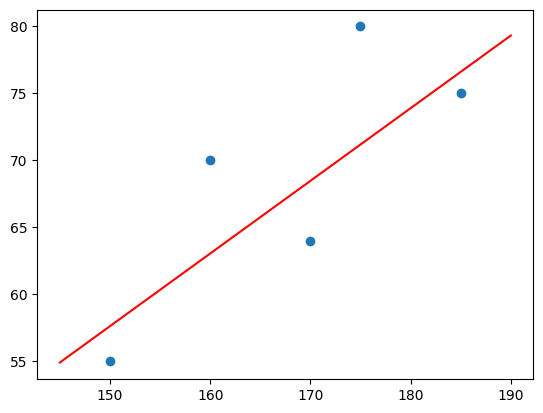

In [8]:
x_plot = torch.linspace(145, 190, 100)
y_plot = a_opt * x_plot + b_opt

plt.plot(x,y,'o')
plt.plot(x_plot, y_plot, 'r')

Epoch : 1, train loss : 28.2000
Weight : 5.4900, Bias: -34.9700


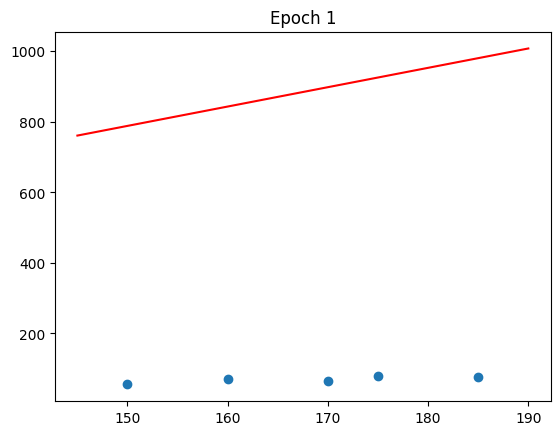

--------------------
Epoch : 2, train loss : -818.5499
Weight : 10.5300, Bias: -34.9400


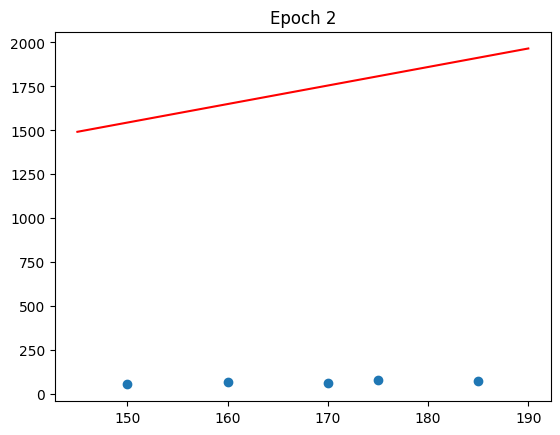

--------------------
Epoch : 3, train loss : -1665.3000
Weight : 15.5700, Bias: -34.9100


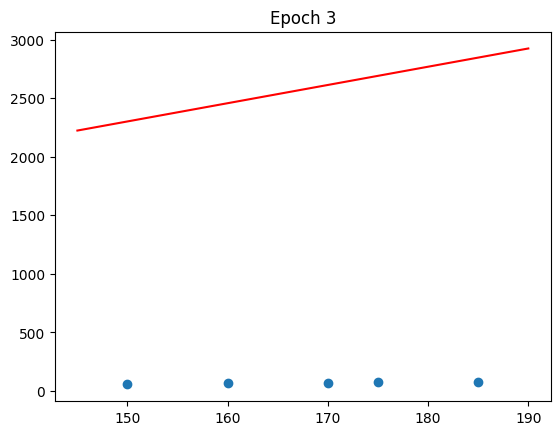

--------------------
Epoch : 4, train loss : -2512.0500
Weight : 20.6100, Bias: -34.8800


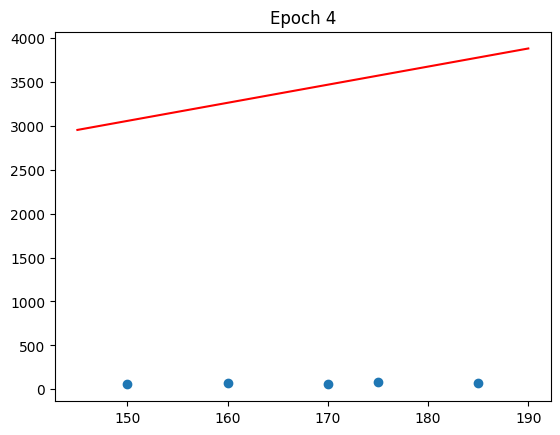

--------------------
Epoch : 5, train loss : -3358.8000
Weight : 25.6500, Bias: -34.8500


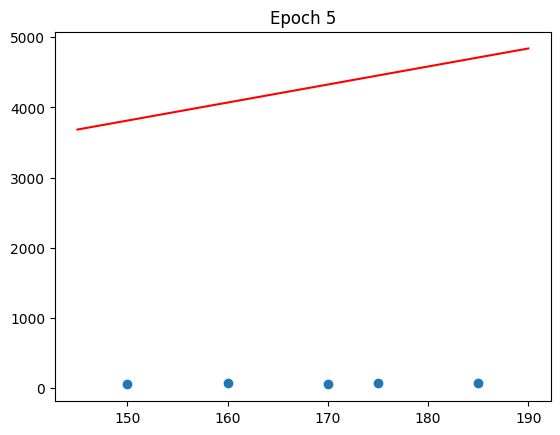

--------------------
Epoch : 6, train loss : -4205.5503
Weight : 30.6900, Bias: -34.8200


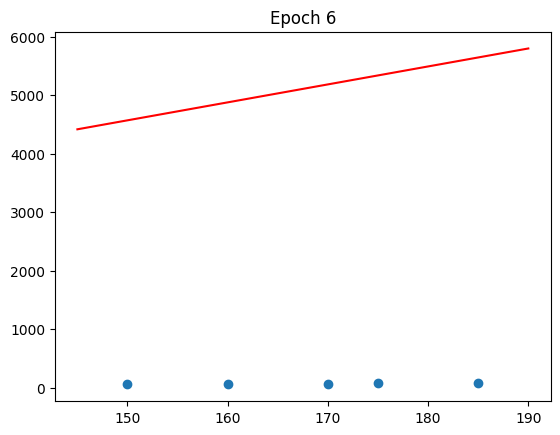

--------------------
Epoch : 7, train loss : -5052.3003
Weight : 35.7300, Bias: -34.7900


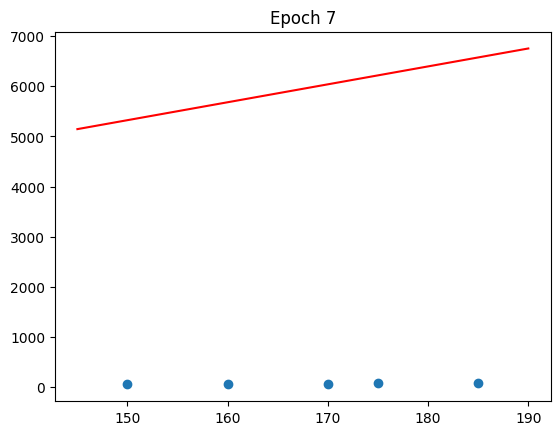

--------------------
Epoch : 8, train loss : -5899.0508
Weight : 40.7700, Bias: -34.7600


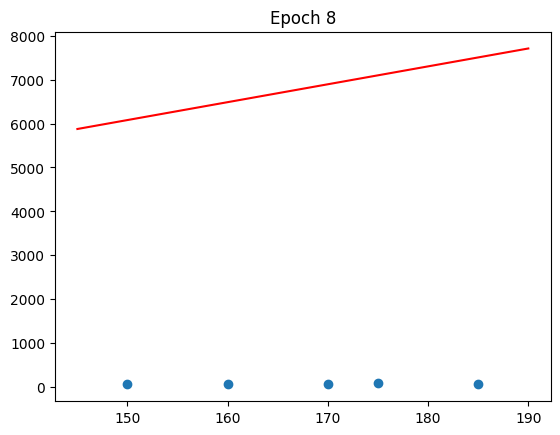

--------------------
Epoch : 9, train loss : -6745.8008
Weight : 45.8100, Bias: -34.7300


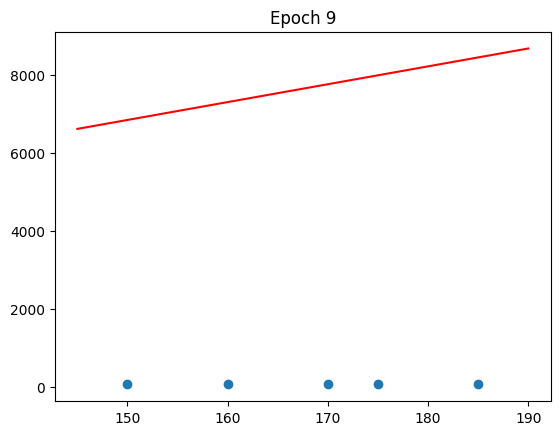

--------------------
Epoch : 10, train loss : -7592.5508
Weight : 50.8500, Bias: -34.7000


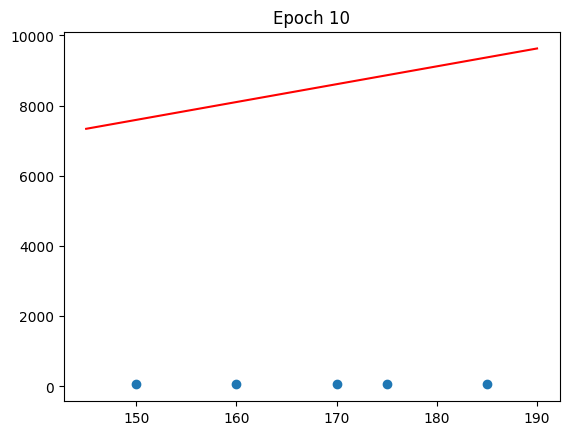

--------------------
Epoch : 11, train loss : -8439.3008
Weight : 55.8900, Bias: -34.6700


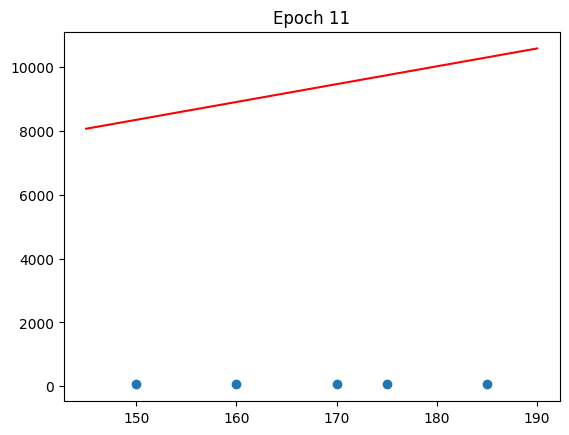

--------------------
Epoch : 12, train loss : -9286.0508
Weight : 60.9300, Bias: -34.6400


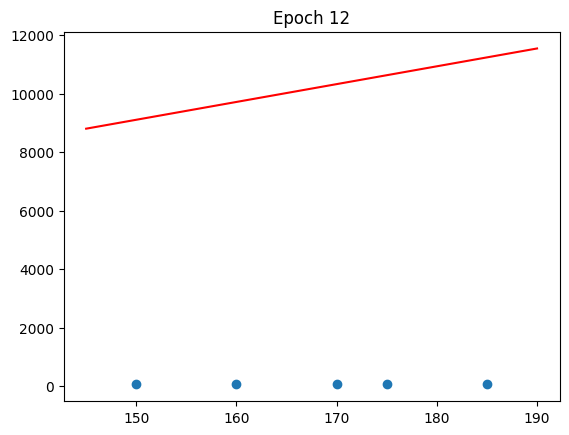

--------------------
Epoch : 13, train loss : -10132.8018
Weight : 65.9700, Bias: -34.6100


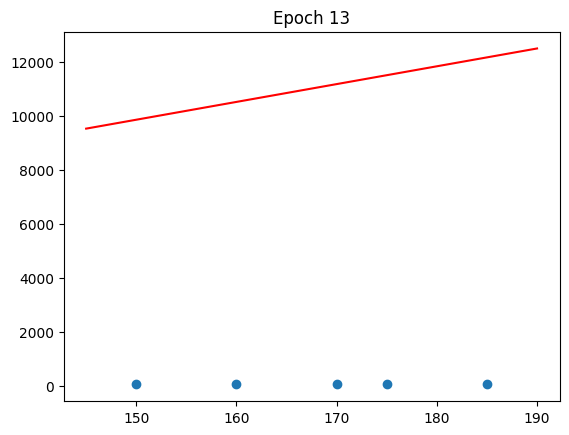

--------------------
Epoch : 14, train loss : -10979.5508
Weight : 71.0100, Bias: -34.5800


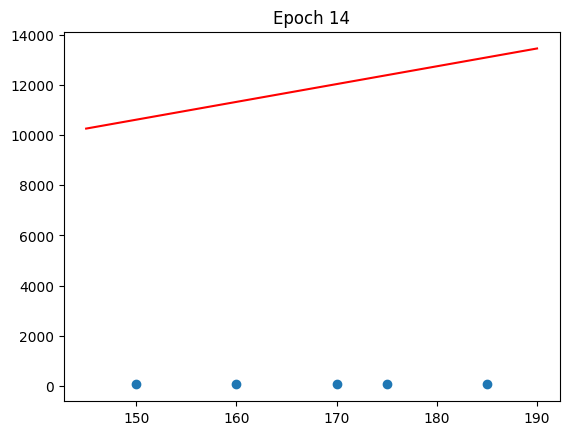

--------------------
Epoch : 15, train loss : -11826.3018
Weight : 76.0500, Bias: -34.5500


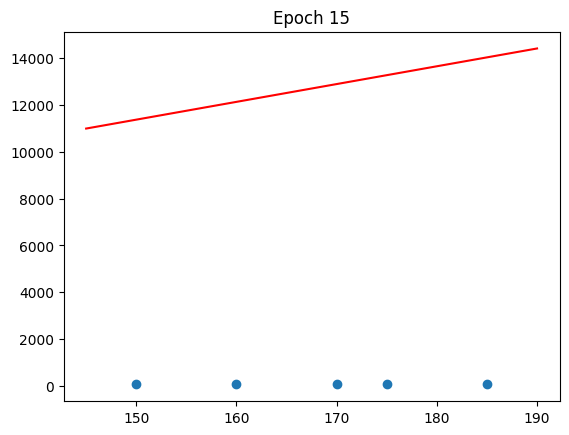

--------------------
Epoch : 16, train loss : -12673.0527
Weight : 81.0900, Bias: -34.5200


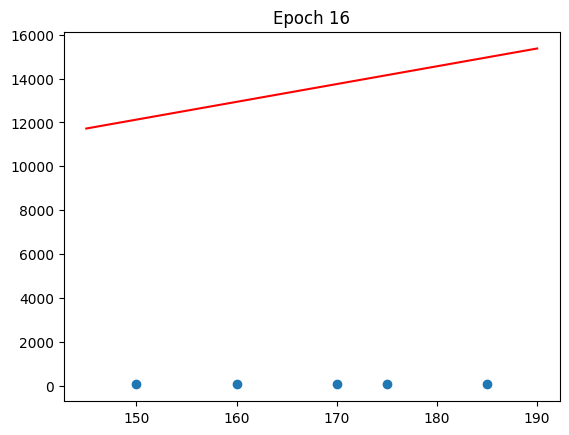

--------------------
Epoch : 17, train loss : -13519.8027
Weight : 86.1300, Bias: -34.4900


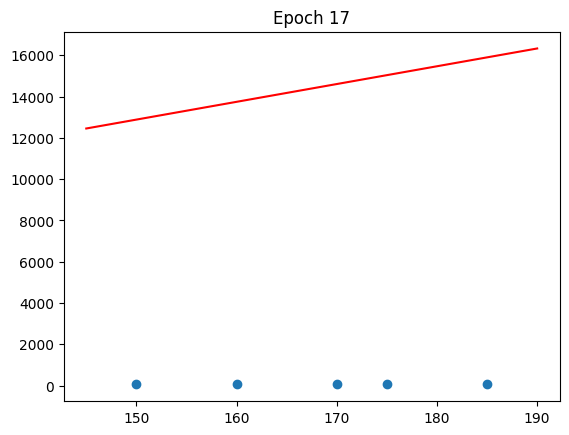

--------------------
Epoch : 18, train loss : -14366.5527
Weight : 91.1700, Bias: -34.4600


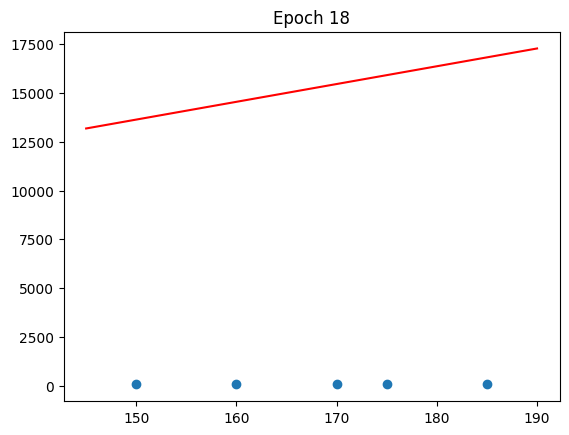

--------------------
Epoch : 19, train loss : -15213.3027
Weight : 96.2100, Bias: -34.4300


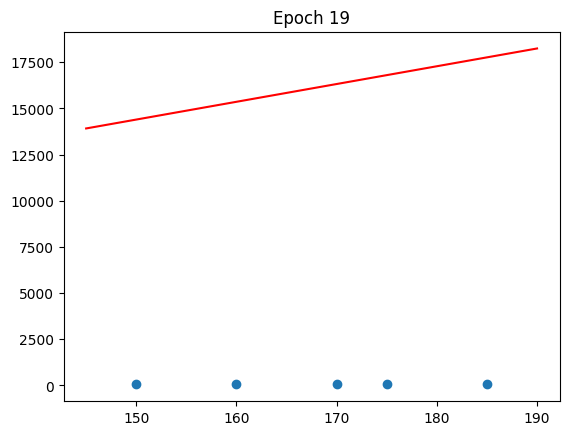

--------------------
Epoch : 20, train loss : -16060.0527
Weight : 101.2500, Bias: -34.4000


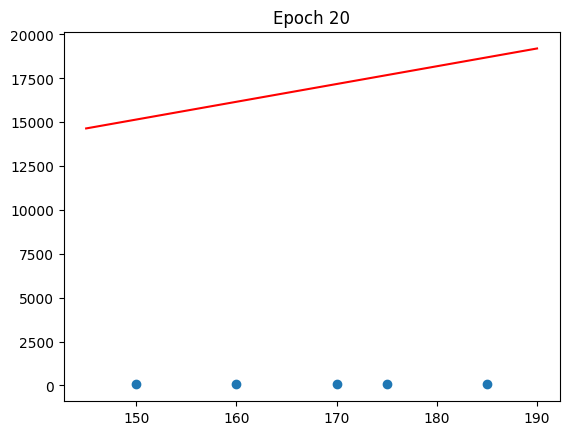

--------------------


In [13]:
# 모델 파라미터 초기화
a = torch.tensor([0.45], requires_grad = True)
b = torch.tensor([-35.], requires_grad = True)

# 하이퍼 파라미터 설정
LR = 3e-6
EPOCH = 20

loss_history = []

for ep in range(EPOCH):
  # inference
  y_hat = a*x + b
  # loss
  loss = 0
  for n in range(N):
    loss += (y[n] - y_hat[n])**2
  loss = loss/N
  # update
  loss.backward()
  with torch.no_grad():
    a -= LR * a.grad # weight update
    b -= LR * b.grad # weight update
  a.grad = torch.tensor([0.]) # gradient 초기화
  b.grad = torch.tensor([0.]) # gradient 초기화

  loss_history += [loss.item()]
  print(f"Epoch : {ep+1 }, train loss : {loss.item():.4f}")

  # print weight and bias
  print(f"Weight : {a.item():.4f}, Bias: {b.item():.4f}")

  # plot graph
  x_plot = torch.linspace(145, 190, 100)
  y_plot = a.detach() * x_plot + b.detach()

  plt.figure()
  plt.plot(x,y, 'o')
  plt.plot(x_plot, y_plot, 'r')
  plt.title(f"Epoch {ep+1}")
  plt.show()

  print("-"*20)


Epoch: 1, train loss: 900.5650
Weight: 0.4780, Bias : -34.9998


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


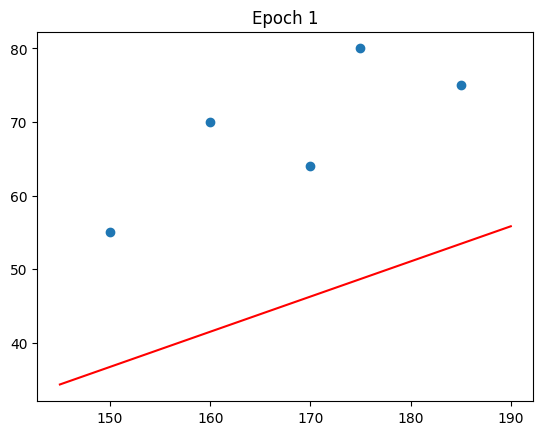

--------------------
Epoch: 2, train loss: 660.9294
Weight: 0.5013, Bias : -34.9997


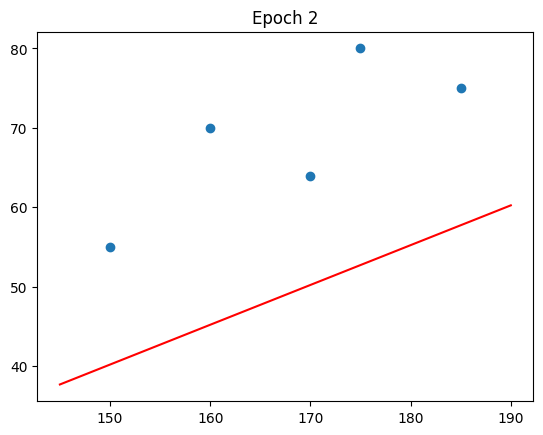

--------------------
Epoch: 3, train loss: 495.9343
Weight: 0.5206, Bias : -34.9996


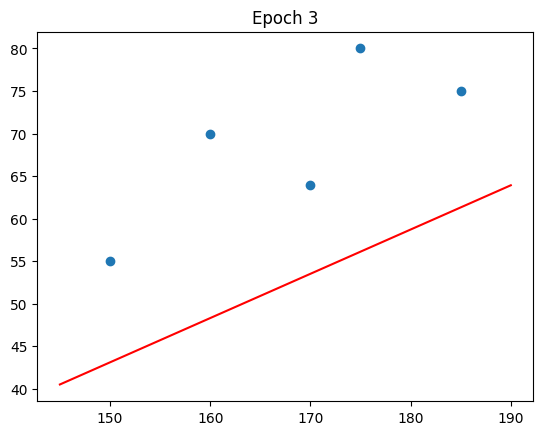

--------------------
Epoch: 4, train loss: 382.3307
Weight: 0.5366, Bias : -34.9995


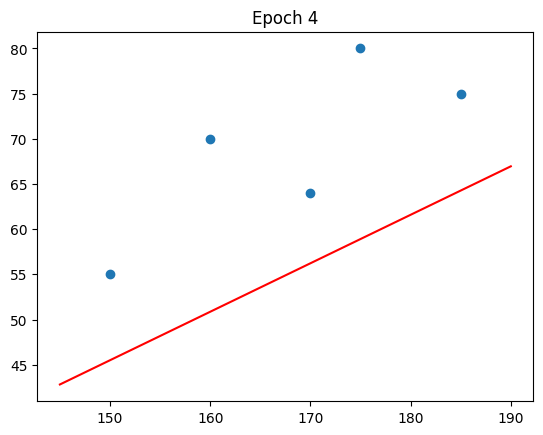

--------------------
Epoch: 5, train loss: 304.1121
Weight: 0.5499, Bias : -34.9994


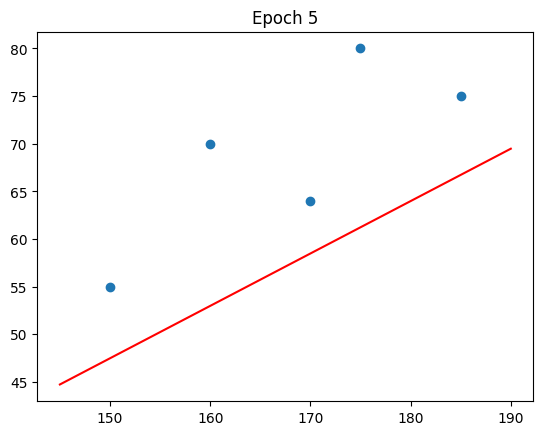

--------------------
Epoch: 6, train loss: 250.2566
Weight: 0.5609, Bias : -34.9993


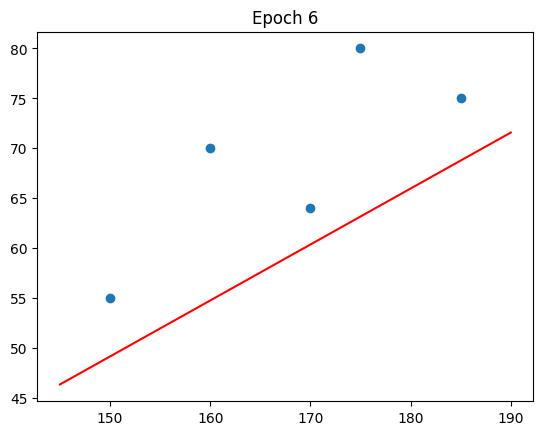

--------------------
Epoch: 7, train loss: 213.1756
Weight: 0.5701, Bias : -34.9993


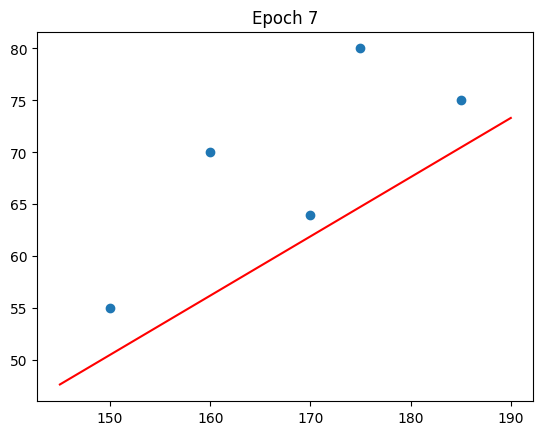

--------------------
Epoch: 8, train loss: 187.6445
Weight: 0.5777, Bias : -34.9992


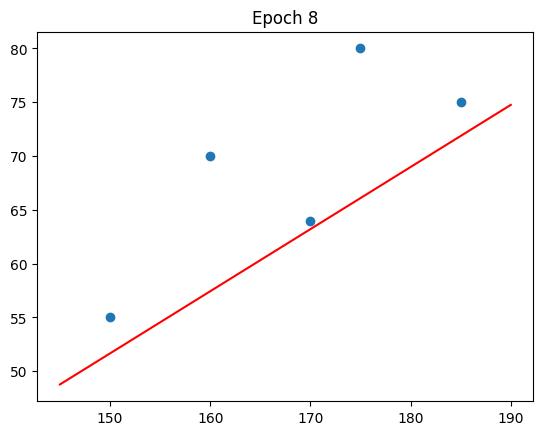

--------------------
Epoch: 9, train loss: 170.0657
Weight: 0.5840, Bias : -34.9992


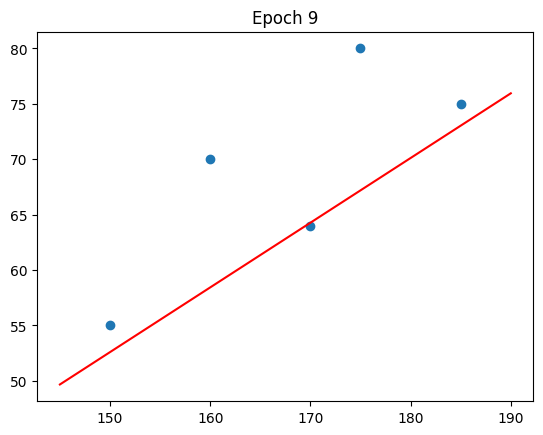

--------------------
Epoch: 10, train loss: 157.9622
Weight: 0.5892, Bias : -34.9991


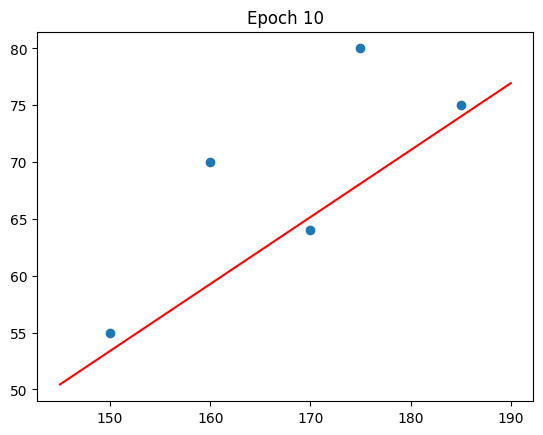

--------------------
Epoch: 11, train loss: 149.6288
Weight: 0.5935, Bias : -34.9991


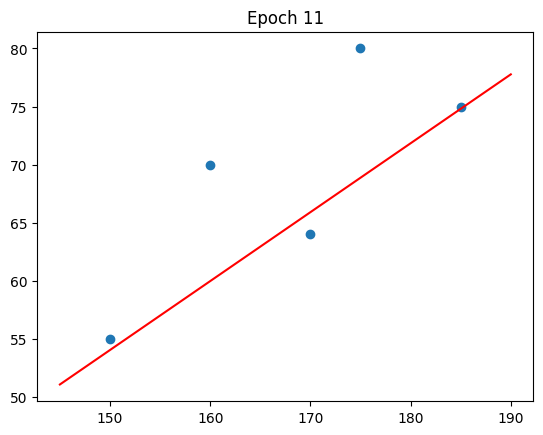

--------------------
Epoch: 12, train loss: 143.8909
Weight: 0.5971, Bias : -34.9991


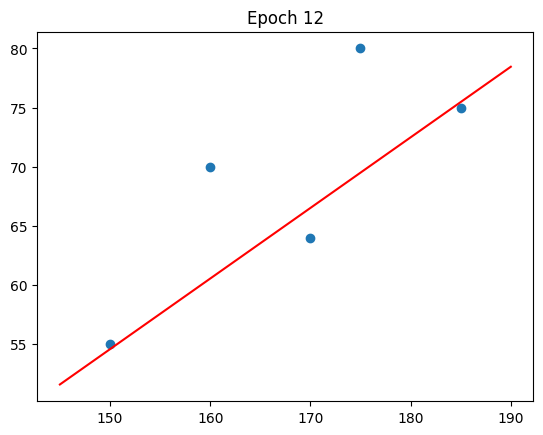

--------------------
Epoch: 13, train loss: 139.9402
Weight: 0.6001, Bias : -34.9991


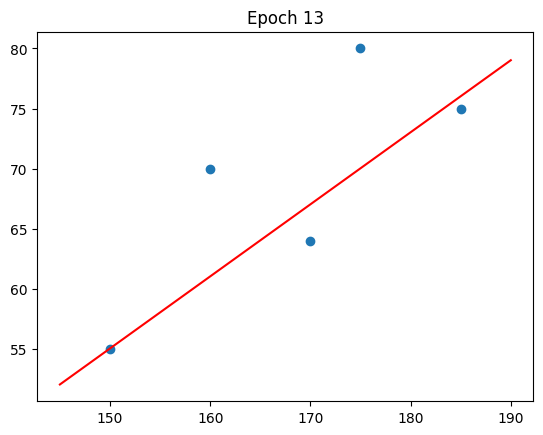

--------------------
Epoch: 14, train loss: 137.2202
Weight: 0.6026, Bias : -34.9991


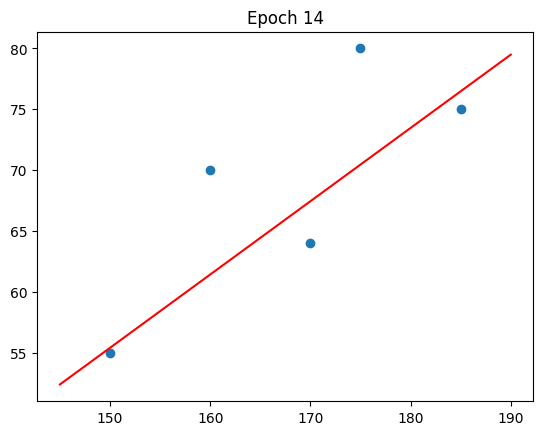

--------------------
Epoch: 15, train loss: 135.3472
Weight: 0.6046, Bias : -34.9990


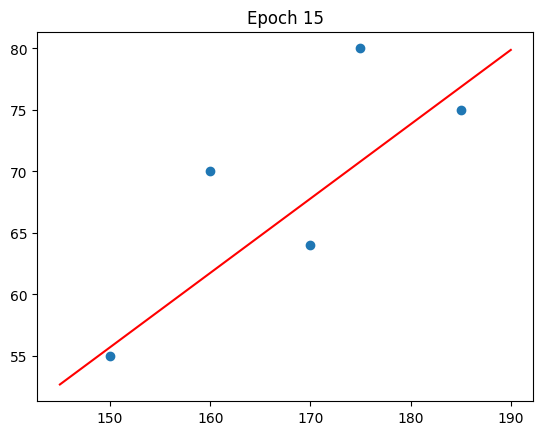

--------------------
Epoch: 16, train loss: 134.0578
Weight: 0.6064, Bias : -34.9990


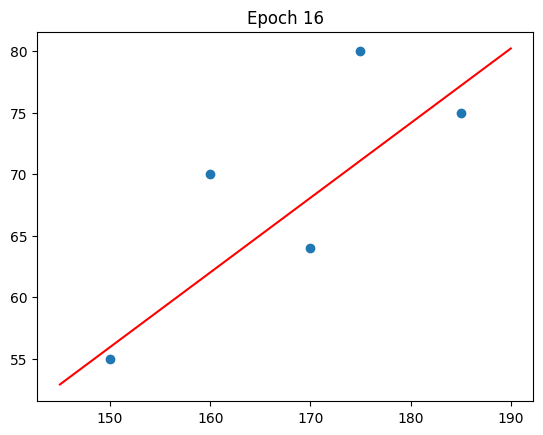

--------------------
Epoch: 17, train loss: 133.1698
Weight: 0.6078, Bias : -34.9990


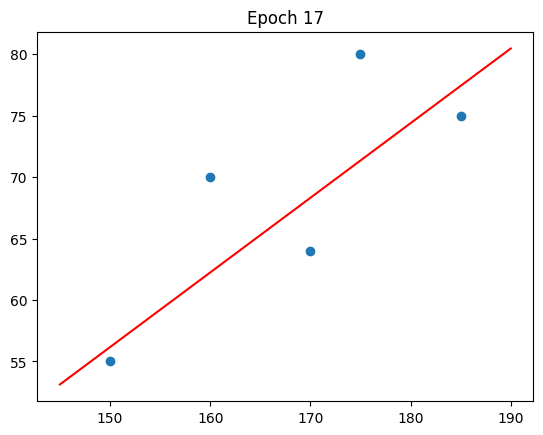

--------------------
Epoch: 18, train loss: 132.5586
Weight: 0.6089, Bias : -34.9990


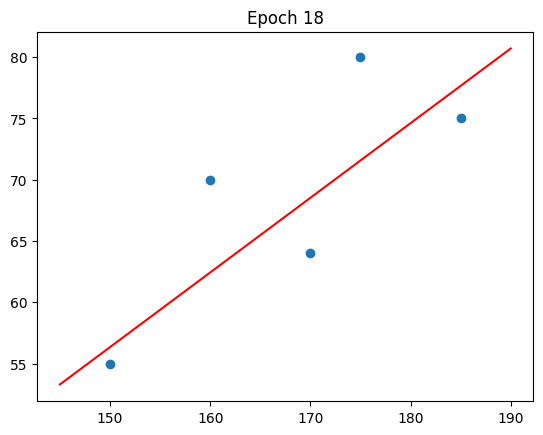

--------------------
Epoch: 19, train loss: 132.1376
Weight: 0.6099, Bias : -34.9990


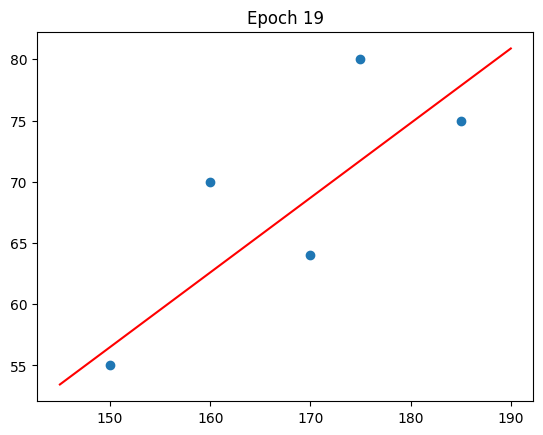

--------------------
Epoch: 20, train loss: 131.8478
Weight: 0.6107, Bias : -34.9990


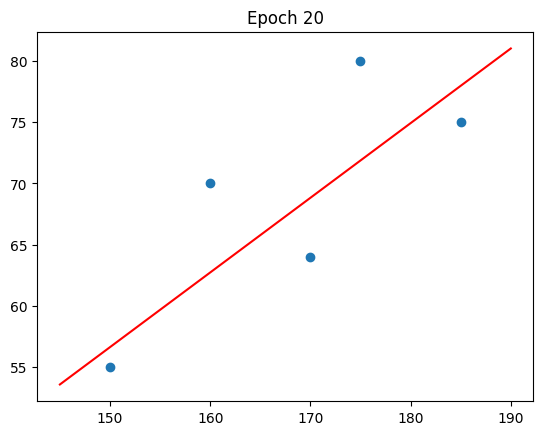

--------------------


In [16]:
# 토치를 사용해서 gradient를 사용한 경우

from torch import nn, optim

x = x.reshape(-1,1)

model = nn.Linear(1,1)
model.weight.data = torch.tensor([[0.45]])
model.bias.data = torch.tensor([-35.])

LR = 3e-6
EPOCH = 20
optimizer = optim.SGD(model.parameters(), lr =LR)
criterion = nn.MSELoss()

loss_history = []

for ep in range(EPOCH):
  # inference
  y_hat = model(x)
  # loss
  loss = criterion(y_hat,y)
  # update
  optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
  loss.backward() # backpropagation
  optimizer.step() # weight update

  # print loss
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")

  # print weight and bias
  print(f"Weight: {model.weight.data.item():.4f}, Bias : {model.bias.data.item():.4f}")

  #plot graph
  x_plot = torch.linspace(145, 190, 100)
  y_plot = model.weight.squeeze().detach() * x_plot + model.bias.detach()

  plt.figure()
  plt.plot(x,y,'o')
  plt.plot(x_plot, y_plot, 'r')
  plt.title(f"Epoch {ep+1}")
  plt.show()

  print("-"*20)

Text(0.5, 1.0, 'Training Loss')

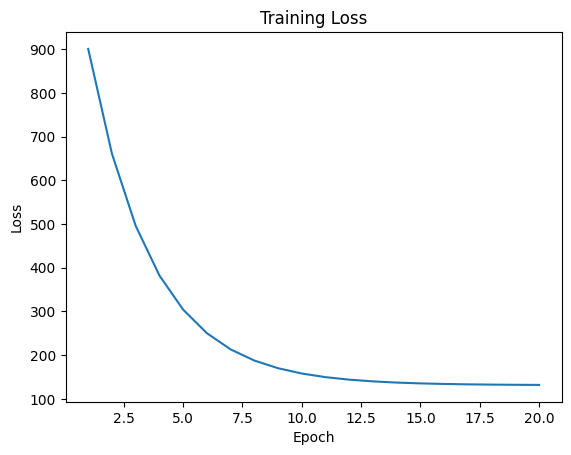

In [17]:
# plot loss_history
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")